In [ ]:
import numpy as np
from math import sqrt
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def distance_matrix(points):
    num_points = len(points)
    dist_matrix = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(num_points):
            if i == 0:
              dist_matrix[i][j] = points[j]

    return dist_matrix

def plot_distance_matrix(dist_matrix):
    plt.imshow(dist_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xlabel('Points')
    plt.ylabel('Points')
    plt.title('Distance Matrix')
    plt.show()
    
def compute_adjacency_matrix(
    route_distances: np.ndarray
):
    """Computes the adjacency matrix from distances matrix.

    It uses the formula in https://github.com/VeritasYin/STGCN_IJCAI-18#data-preprocessing to
    compute an adjacency matrix from the distance matrix.
    The implementation follows that paper.

    Args:
        route_distances: np.ndarray of shape `(num_routes, num_routes)`. Entry `i,j` of this array is the
            distance between roads `i,j`.
        sigma2: Determines the width of the Gaussian kernel applied to the square distances matrix.
        epsilon: A threshold specifying if there is an edge between two nodes. Specifically, `A[i,j]=1`
            if `np.exp(-w2[i,j] / sigma2) >= epsilon` and `A[i,j]=0` otherwise, where `A` is the adjacency
            matrix and `w2=route_distances * route_distances`

    Returns:
        A boolean graph adjacency matrix.
    """
    num_routes = route_distances.shape[0]
    route_distances = route_distances / 10000.0
    w2, w_mask = (
        route_distances * route_distances,
        np.ones([num_routes, num_routes]) - np.identity(num_routes),
    )
    return  w_mask

def distance_matrix(points):
    num_points = len(points)
    dist_matrix = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(num_points):
            if i == 0:
              dist_matrix[i][j] = points[j]

    return dist_matrix
# Esempio di utilizzo
# Sostituisci questo elenco di punti con il tuo elenco di coordinate (x, y, z, ecc.)
points_list = [
    [0, 0],
    [1, 1],
    [2, 2],
    [3, 3]
]

# Converti la lista di punti in un array NumPy
points_array = np.array(points_list)

In [ ]:
data = pd.read_csv("AdapMeteo (1).csv").drop("DATE", axis=1)[0:3300]


In [ ]:
D = np.array([[0, 8.86, 7.49, 8.41, 5.28, 5.59,3],[8.86,0,0,0,0,0,0],[7.49,0,0,0,0,0,0],[8.41,0,0,0,0,0,0],[5.28,0,0,0,0,0,0],[5.59,0,0,0,0,0,0],[3,0,0,0,0,0,0]])
print(D)

[[0.   8.86 7.49 8.41 5.28 5.59 3.  ]
 [8.86 0.   0.   0.   0.   0.   0.  ]
 [7.49 0.   0.   0.   0.   0.   0.  ]
 [8.41 0.   0.   0.   0.   0.   0.  ]
 [5.28 0.   0.   0.   0.   0.   0.  ]
 [5.59 0.   0.   0.   0.   0.   0.  ]
 [3.   0.   0.   0.   0.   0.   0.  ]]


In [ ]:
import typing
from typing import Tuple


class GraphInfo:
    def __init__(self, edges: typing.Tuple[list, list], num_nodes: int):
        self.edges = edges
        self.num_nodes = num_nodes

adjacency_matrix = compute_adjacency_matrix(D)
print(adjacency_matrix)
node_indices, neighbor_indices = np.where(adjacency_matrix == 1)
print(node_indices)
print(neighbor_indices)
graph = GraphInfo(
    edges=(node_indices.tolist(), neighbor_indices.tolist()),
    num_nodes=adjacency_matrix.shape[0],
)
print(f"number of nodes: {graph.num_nodes}, number of edges: {len(graph.edges[0])}")

[[0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 0.]]
[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6
 6 6 6 6 6]
[1 2 3 4 5 6 0 2 3 4 5 6 0 1 3 4 5 6 0 1 2 4 5 6 0 1 2 3 5 6 0 1 2 3 4 6 0
 1 2 3 4 5]
number of nodes: 7, number of edges: 42


In [ ]:
print(np.array(graph.edges).shape)


(2, 42)


In [ ]:
#!pip install torch_geometric

In [ ]:
import torch
from torch_geometric.data import Data
edge_index = np.array(graph.edges)

In [ ]:
print(edge_index)

[[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5
  6 6 6 6 6 6]
 [1 2 3 4 5 6 0 2 3 4 5 6 0 1 3 4 5 6 0 1 2 4 5 6 0 1 2 3 5 6 0 1 2 3 4 6
  0 1 2 3 4 5]]


In [ ]:
import numpy as np

def distance_matrix_to_edge_index(distance_matrix, threshold):
    # Thresholding the distance matrix to determine edges
    adjacency_matrix = (distance_matrix < threshold).astype(int)

    # Compute edge index from adjacency matrix
    edge_index = np.transpose(np.nonzero(adjacency_matrix))

    return edge_index

# Example distance matrix
distance_matrix = np.array([[0, 1.2, 2.5, 0],
                            [1.2, 0, 0, 1.8],
                            [2.5, 0, 0, 1.7],
                            [0, 1.8, 1.7, 0]])

# Set a threshold to determine edges (e.g., 2.0)
threshold = 2.0

edge_index = distance_matrix_to_edge_index(distance_matrix, threshold)
print(edge_index)

[[0 0]
 [0 1]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]


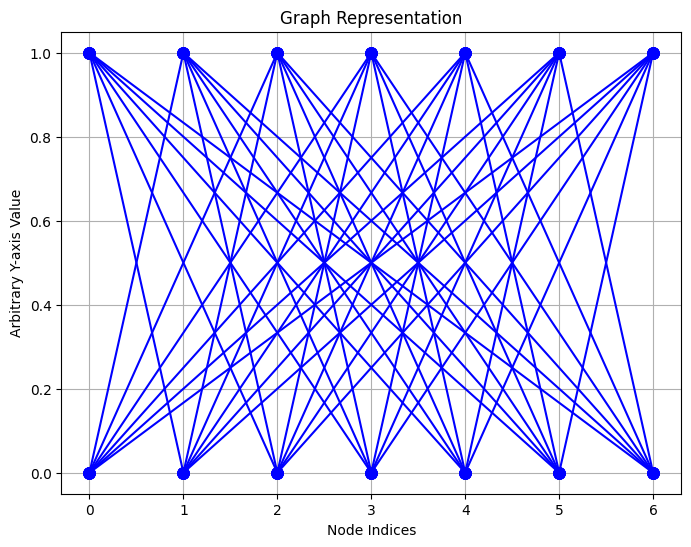

In [ ]:
# Example plot of the graph (for illustration purposes)
# We'll plot edges using lines connecting the nodes
plt.figure(figsize=(8, 6))
for i in range(len(graph.edges[0])):
    start_node = graph.edges[0][i]
    end_node = graph.edges[1][i]
    plt.plot([start_node, end_node], [0, 1], marker='o', linestyle='-', color='b', markersize=8)

plt.xlabel("Node Indices")
plt.ylabel("Arbitrary Y-axis Value")
plt.title("Graph Representation")
plt.grid(True)
plt.show()

In [ ]:
#scaler_x = MinMaxScaler().fit(train_array[:,-1].reshape(-1, 1))

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

batch_size = 64
input_sequence_length = 12
forecast_horizon = 3
multi_horizon = False


class TimeSeriesDataset(Dataset):
    def __init__(self, data_array, input_sequence_length, forecast_horizon, multi_horizon):
        self.data_array = data_array
        self.input_sequence_length = input_sequence_length
        self.forecast_horizon = forecast_horizon
        self.multi_horizon = multi_horizon

    def __len__(self):
        return len(self.data_array) - self.input_sequence_length - self.forecast_horizon + 1

    def __getitem__(self, idx):
        inputs = self.data_array[idx : idx + self.input_sequence_length, :]
        targets = self.data_array[
            idx + self.input_sequence_length : idx + self.input_sequence_length + self.forecast_horizon,
            :,
        ]
        if not self.multi_horizon:
            targets = targets[-1, :]
        return torch.unsqueeze(torch.Tensor(inputs), dim=0), torch.unsqueeze(torch.Tensor(targets), dim=0)


def create_torch_dataloader(data_array, input_sequence_length, forecast_horizon, batch_size=128, shuffle=True, multi_horizon=True):
    dataset = TimeSeriesDataset(data_array, input_sequence_length, forecast_horizon, multi_horizon)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.nn import Linear, Dropout
from torch_geometric.nn import GATv2Conv

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_array = pd.read_csv("AdapMeteo (1).csv").drop("DATE", axis=1)[1:5000]
#col0=["VALUE_LT_STA0","VALUE_LF_STA0","VALUE_LT_STA1","VALUE_LF_STA1","VALUE_LT_STA2","VALUE_LF_STA2","VALUE_LT_STA3",
#      "VALUE_LF_STA3","VALUE_LT_STA4","VALUE_LF_STA4","VALUE_LT_STA5","VALUE_LF_STA5","VALUE_LT_STA6","VALUE_LF_STA6"]
col0=["VALUE_LT_STA0","VALUE_LT_STA1","VALUE_LT_STA2","VALUE_LT_STA3",
      "VALUE_LT_STA4","VALUE_LT_STA5","VALUE_LT_STA6"]
data_array=data_array[col0]
train_ratio = 0.8  # Adjust the ratio as per your requirement
train_size = int(len(data_array) * train_ratio)
train_array = data_array[:train_size]
val_array = data_array[train_size:]
scaler = MinMaxScaler().fit(train_array)
train_last_column = train_array.iloc[:, -1]
scaler_x = MinMaxScaler().fit(np.array(train_last_column).reshape(-1, 1))
train_array= scaler.transform(train_array)
val_array  = scaler.transform(val_array)
val_array

array([[0.27350427, 0.22488038, 0.26696833, ..., 0.28712871, 0.38392857,
        0.29577465],
       [0.27350427, 0.22488038, 0.26244344, ..., 0.29207921, 0.38839286,
        0.34741784],
       [0.27350427, 0.22488038, 0.26244344, ..., 0.29207921, 0.41071429,
        0.38497653],
       ...,
       [0.57264957, 0.55980861, 0.52941176, ..., 0.40594059, 0.35267857,
        0.46948357],
       [0.55982906, 0.54545455, 0.48868778, ..., 0.38118812, 0.35267857,
        0.48356808],
       [0.59401709, 0.52631579, 0.52036199, ..., 0.36633663, 0.33928571,
        0.45539906]])

In [ ]:
'''dat0=data_array[col0]
col1=["VALUE_LT_STA1","VALUE_LF_STA1"]
dat1=data_array[col1]
col2=["VALUE_LT_STA2","VALUE_LF_STA2"]
dat2=data_array[col2]
col3=["VALUE_LT_STA3","VALUE_LF_STA3"]
dat3=data_array[col3]
col4=["VALUE_LT_STA4","VALUE_LF_STA4"]
dat4=data_array[col4]
col5=["VALUE_LT_STA5","VALUE_LF_STA5"]
dat5=data_array[col5]
col6=["VALUE_LT_STA6","VALUE_LF_STA6"]
dat6=data_array[col6]'''

'dat0=data_array[col0]\ncol1=["VALUE_LT_STA1","VALUE_LF_STA1"]\ndat1=data_array[col1]\ncol2=["VALUE_LT_STA2","VALUE_LF_STA2"]\ndat2=data_array[col2]\ncol3=["VALUE_LT_STA3","VALUE_LF_STA3"]\ndat3=data_array[col3]\ncol4=["VALUE_LT_STA4","VALUE_LF_STA4"]\ndat4=data_array[col4]\ncol5=["VALUE_LT_STA5","VALUE_LF_STA5"]\ndat5=data_array[col5]\ncol6=["VALUE_LT_STA6","VALUE_LF_STA6"]\ndat6=data_array[col6]'

In [ ]:
edge_index = torch.tensor(edge_index)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

def create_torch_dataloader(data_array, input_sequence_length, forecast_horizon, batch_size):
    # Calculate the total number of windows that can be created from the data
    num_windows = len(data_array) - input_sequence_length - forecast_horizon + 1

    # Initialize arrays to store the input sequences (batch_x) and output sequences (batch_y)
    batch_x = []
    batch_y = []

    # Create overlapping windows of input_sequence_length for input (batch_x) and forecast_horizon for output (batch_y)
    for i in range(num_windows):
        input_window = data_array[i : i + input_sequence_length]
        output_window = data_array[i + input_sequence_length : i + input_sequence_length + forecast_horizon]
        batch_x.append(input_window)
        batch_y.append(output_window)

    # Convert the lists of input and output windows to PyTorch tensors
    batch_x = torch.tensor(batch_x, dtype=torch.float32)
    #print(batch_x.shape)
    batch_y = torch.tensor(batch_y, dtype=torch.float32)

    # Create a TensorDataset to hold both input and output tensors
    dataset = TensorDataset(batch_x, batch_y)

    # Create a DataLoader to handle batching and shuffling (if needed)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    return dataloader

# Usage example:
# Assuming you have the following variables defined:
# train_array: Your training data array
# val_array: Your validation data array
# input_sequence_length: Length of the input sequences
# forecast_horizon: Forecast horizon for predictions
# batch_size: Size of each batch

# Create the train_dataset and val_dataset using the modified create_torch_dataloader function
train_dataset, val_dataset = (
    create_torch_dataloader(data_array, input_sequence_length=30, forecast_horizon=1, batch_size=1)
    for data_array in [train_array, val_array]
)



In [ ]:
class GAT(torch.nn.Module):
  """Graph Attention Network"""
  def __init__(self, dim_in, dim_h, dim_out, heads=1):
    super().__init__()
    self.gat1 = GATv2Conv(in_channels=dim_in,out_channels=dim_h, heads=heads)
    self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)

  def forward(self, x, edge_index):
    x = x.view(-1, x.size(-1))
    h = self.gat1(x, edge_index.permute(1,0))
    h = F.elu(h)
    #h = F.dropout(h, p=0.6, training=self.training)
    h = self.gat2(h, edge_index.permute(1,0))
    return h

In [ ]:
class LSTMGC(nn.Module):
    """Layer comprising a convolution layer followed by LSTM and dense layers."""

    def __init__(
        self,
        in_feat,
        dim_h,
        out_feat,
        lstm_units: int,
        input_seq_len: int,
        output_seq_len: int,
        graph_info: GraphInfo,
        graph_conv_params: typing.Optional[dict] = None,
    ):
        super(LSTMGC, self).__init__()
        self.graph_conv = GAT(in_feat, dim_h, out_feat, heads=1)
        self.lstm = nn.LSTM(out_feat, output_seq_len)
        self.dense = nn.Linear(out_feat,1)
        self.input_seq_len, self.output_seq_len = input_seq_len, output_seq_len


    def forward(self, inputs, edges):
        """Forward pass.

        Args:
            inputs: torch.Tensor of shape `(batch_size, input_seq_len, num_nodes, in_feat)`

        Returns:
            A tensor of shape `(batch_size, output_seq_len, num_nodes)`.
        """

        gcn_out = self.graph_conv(
            inputs, edges
        )
        #shape = gcn_out.shape
        """num_nodes, batch_size, input_seq_len, out_feat = (
            shape[0],
            shape[1],
            shape[2],
            shape[3],
        )"""

        gcn_out = inputs.reshape(7, 30, out_feat)
        lstm_out, _ = self.lstm(
            gcn_out
        )  # lstm_out has shape: (batch_size * num_nodes, input_seq_len, lstm_units)
        lstm_out = lstm_out.reshape(7,1, 30, out_feat)
        lstm_out = lstm_out[-1,:, -1:, -1:]  # Take the last time step output
        dense_output = self.dense(lstm_out)
        return lstm_out  # returns Tensor of shape (batch_size, output_seq_len, num_node)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# Assuming `train_dataset` and `val_dataset` are PyTorch DataLoader objects
# and the dataset provides inputs and targets with the correct shapes.


# Define parameters
in_feat = 1
h_feat = 3
out_feat = 1
lstm_units = 64
input_sequence_length = 30
forecast_horizon = 1
multi_horizon = False


# Define the graph information and create the GraphConv layer
# Replace `graph` with your actual graph_info object
# E.g., graph = GraphInfo(edges=edges, num_nodes=num_nodes)
graph =GraphInfo(
    edges=(node_indices.tolist(), neighbor_indices.tolist()),
    num_nodes=adjacency_matrix.shape[0],
)  # Replace None with your actual graph_info object

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Sposta il modello sulla GPU
# Create the LSTMGC model
st_gcn = LSTMGC(
    in_feat,
    h_feat,
    out_feat,
    lstm_units,
    input_sequence_length,
    forecast_horizon,
    graph
    )
st_gcn.to(device)
# Assuming `train_dataset` and `val_dataset` are DataLoader objects
# and the dataset provides inputs and targets with the correct shapes.
from torch.optim.lr_scheduler import ReduceLROnPlateau
learning_rate = 0.001

# Create the Adam optimizer and pass the model parameters and learning rate
optimizer = optim.Adam(st_gcn.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)


# Loss function and optimizer
criterion = nn.MSELoss()
edge_index = edge_index.to(device)
# Training loop
epochs = 50
best_accuracy = np.inf

for epoch in range(epochs):
    st_gcn.train()
    train_loss = 0.0
    for inputs, targets in train_dataset:
        optimizer.zero_grad()
        #print(inputs.shape)
        #inputs = torch.reshape(inputs, (210, 2))
        inputs=torch.reshape(inputs, (7,1,30,1)).to(device)
        targets=torch.reshape(targets,(7,1,1,1)).to(device)
        # Forward pass
        outputs = st_gcn(inputs, edge_index.to(device))
        # Calculate the loss
        #print(outputs.shape)
        #print(targets.shape)
        loss = criterion(outputs, targets[-1,:, -1:, -1:])
        # Backpropagation and optimization
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Calculate average training loss for the epoch
    average_train_loss = train_loss /epochs
    print("Epoch:", epoch, "Loss:", average_train_loss)
    # Validation loop


cuda
Epoch: 0 Loss: 7.675157382310558
Epoch: 1 Loss: 0.17531417089649004
Epoch: 2 Loss: 0.14634722493090344
Epoch: 3 Loss: 0.11900821508565475
Epoch: 4 Loss: 0.09687024166568114
Epoch: 5 Loss: 0.08071137276758365
Epoch: 6 Loss: 0.06875348982343646
Epoch: 7 Loss: 0.05958671320822626
Epoch: 8 Loss: 0.052348013774596074
Epoch: 9 Loss: 0.04659405007622201
Epoch: 10 Loss: 0.04211808930733248
Epoch: 11 Loss: 0.03877183387869778
Epoch: 12 Loss: 0.0364062016820145
Epoch: 13 Loss: 0.03485209271895793
Epoch: 14 Loss: 0.033883872666358276
Epoch: 15 Loss: 0.033268510710010496
Epoch: 16 Loss: 0.03283573757613151
Epoch: 17 Loss: 0.03249002614322232
Epoch: 18 Loss: 0.03218676437583841
Epoch: 19 Loss: 0.03190762012776685
Epoch: 20 Loss: 0.031645348168572555
Epoch: 21 Loss: 0.03139697564096864
Epoch: 22 Loss: 0.031161026058877158
Epoch: 23 Loss: 0.030936452943936068
Epoch: 24 Loss: 0.030722514051104943
Epoch: 25 Loss: 0.030518327142955767
Epoch: 26 Loss: 0.0303230911421301
Epoch: 27 Loss: 0.03013599173

In [ ]:
st_gcn.eval()
val_loss = 0.0
results = []
with torch.no_grad():
    for inputs, targets in val_dataset:
        inputs=inputs.reshape(7,1,30,1)
        targets=targets.reshape(7,1,1,1)
        outputs = st_gcn(inputs.to(device), edge_index.to(device))
        outputs_cpu_numpy = outputs.detach().cpu().numpy()
        results.append(scaler_x.inverse_transform(np.array(outputs_cpu_numpy).reshape(-1, 1)))
        #outputs = outputs.view(-1, forecast_horizon, graph.num_nodes)
        loss = criterion(outputs.to(device), targets[-1,:, -1:, -1:].to(device))
        val_loss += loss.item()
# Calculate average validation loss for the epoch
average_val_loss = val_loss / len(val_dataset)

# Print the losses for this epoch
print(f"Epoch {epoch+1}/{epochs}, Train Loss: {average_train_loss:.6f}, Val Loss: {average_val_loss:.6f}")

# Early stopping based on validation loss improvement
# Add your early stopping logic here.

# The model has been trained!'''

Epoch 50/50, Train Loss: 0.026909, Val Loss: 0.000518


In [ ]:
results = [array.item() for array in results]


[2.649996280670166, 2.536532163619995, 2.311048746109009, 2.423696517944336, 2.4240241050720215, 2.42195200920105, 2.4221584796905518, 2.201404094696045, 2.094108819961548, 2.320345878601074, 2.3186380863189697, 2.2201664447784424, 1.7741678953170776, 1.6718448400497437, 1.6731359958648682, 1.7805824279785156, 1.659674048423767, 1.7858562469482422, 1.6977417469024658, 1.590240716934204, 1.264872431755066, 1.28191339969635, 1.3930706977844238, 0.9626701474189758, 1.2973031997680664, 1.3039798736572266, 0.9827364683151245, 0.9937056303024292, 0.7667055130004883, 0.6587957143783569, 0.675639271736145, 0.5663811564445496, 0.5630638003349304, 0.24574457108974457, 0.46231696009635925, 0.25580471754074097, 0.04845265671610832, -0.16291826963424683, -0.1607409417629242, -0.7012609839439392, -0.9112036228179932, -1.4482773542404175, -1.7576433420181274, -1.7401649951934814, -2.559180498123169, -2.0181286334991455, -2.321474075317383, -3.065152645111084, -2.7264697551727295, -2.7325403690338135,

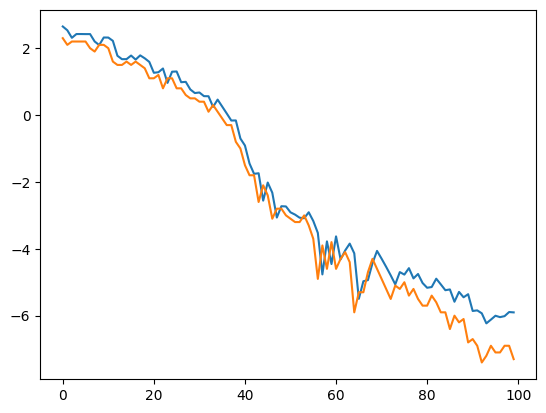

In [ ]:
print(results)
plt.plot(results[0:100])
plt.plot(data_array.iloc[30+train_size:, -1].reset_index(drop=True)[0:100])

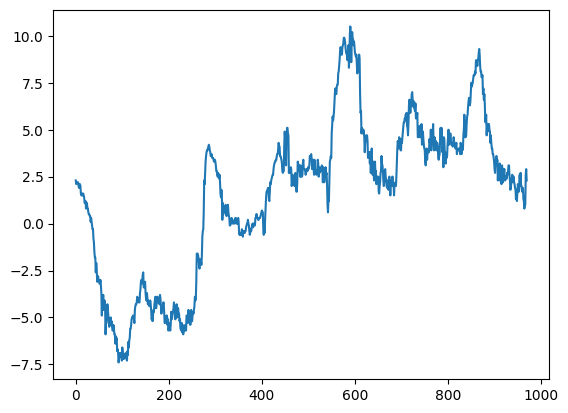

In [ ]:
plt.plot(data_array.iloc[30+train_size:, -1].reset_index(drop=True))

In [ ]:
def MAE(pred, true):
    return np.mean(np.abs(pred - true))
MAE(np.array(results), data_array.iloc[30+train_size:, -1])

0.41183573559075404

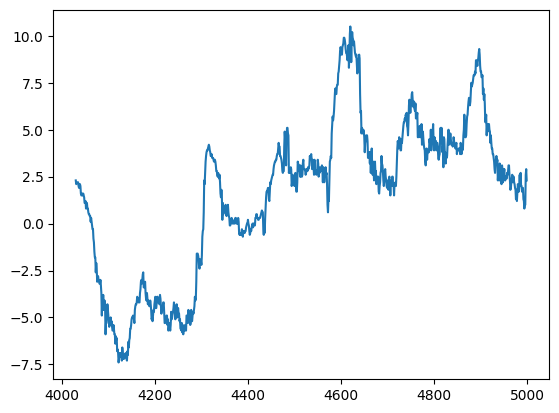

In [ ]:
plt.plot(data_array.iloc[30+train_size:, -1])

In [ ]:
print(scaler.inverse_transform(np.array(outputs).reshape(-1, 1)))

TypeError: ignored

In [ ]:
plt.plot(average_train_loss)